# Supervised Learning → KNN (Classification)

This notebook is part of the **ML-Methods** project.

As with the other classification notebooks,
the first sections focus on data preparation
and are intentionally repeated.

This ensures consistency across models
and allows fair comparison of results.

1. Project setup and common pipeline
2. Dataset loading
3. Train-test split
4. Feature scaling (why we do it)

----------------------------------

5. What is this model? (Intuition)
6. Model training
7. Model behavior and key parameters
8. Predictions
9. Model evaluation
10. When to use it and when not to
11. Model persistence
12. Mathematical formulation (deep dive)
13. Final summary – Code only

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

The goal is not just to run the code,
but to understand what is happening at each step
and be able to adapt it to your own data.

-----------------------------------------------------

## What is KNN Classification?

KNN Classification is a **distance-based classification model**.

Instead of learning a decision boundary during training,
the model makes predictions by comparing data points directly.

-----------------------------------------------------

## Why we start with intuition

KNN is one of the simplest classification models conceptually.

All it does is:
- measure distances between data points
- find the K closest neighbors
- assign the most common class among them

If this idea is clear,
the rest of the notebook becomes easy to follow.

-----------------------------------------------------

## What you should expect from the results

With KNN Classification, you should expect:
- locally adaptive decision boundaries
- sensitivity to feature scaling
- good performance when similar samples exist nearby

However:
- performance can degrade on large datasets
- prediction time increases with dataset size


___________________________________

## 1. Project setup and common pipeline 

In this section we set up the common pipeline
used across classification models in this project.

KNN relies heavily on distances,
so feature scaling is especially important.


In [1]:
# Common imports used across all classification models

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


# ____________________________________
## 2. Dataset loading

In this section we load the dataset
used for the KNN classification task.

We use the same dataset as in Logistic Regression
to allow a direct comparison between models.


In [2]:
# Load the dataset

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


### Inputs and target

- `X` contains the input features
- `y` contains the target labels

This is a binary classification problem,
where the goal is to assign each sample
to one of two possible classes.


### Why using the same dataset matters

Using the same dataset across classification models
allows us to:
- compare performance fairly
- isolate model-specific behavior
- better understand trade-offs between models


# ____________________________________
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This step allows us to evaluate
how well the KNN classifier generalizes
to unseen data.


In [3]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### Why this step is important

KNN does not learn a model during training.
Instead, it relies directly on the training data
to make predictions.

For this reason:
- the training set defines the model’s knowledge
- the test set must remain completely unseen

This separation is essential
to obtain a fair evaluation.


### Note on split proportions

The choice of train-test split
depends on the dataset and problem.

Common splits include:
- 80 / 20
- 70 / 30
- 90 / 10

Here we use 80 / 20
as a reasonable default for demonstration purposes.


# ____________________________________
## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input features.

For KNN Classification, feature scaling is **mandatory**.
Without scaling, the model will produce incorrect results.


### Why scaling is critical for KNN

KNN is a **distance-based model**.

This means that:
- predictions depend entirely on distances between samples
- features with larger numerical ranges dominate the distance
- unscaled data leads to biased neighbor selection


### Important rule: fit only on training data

As with all preprocessing steps:
- the scaler is fitted only on the training data
- the same scaler is applied to test data

This prevents data leakage
and ensures fair evaluation.


In [4]:
# Feature scaling (mandatory for KNN)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### What we have after this step

- scaled training data
- scaled test data
- a valid input space for distance computation

At this point, the data is ready
to be used by the KNN classifier.


# ____________________________________
## 5. What is this model? (KNN Classification)

Before training the model, it is important to understand
what KNN Classification does conceptually.

KNN Classification is a **non-parametric, instance-based model**
that makes predictions by comparing data points directly.


### The core idea

To classify a new data point, KNN:
- computes the distance to all training samples
- selects the K closest neighbors
- assigns the most frequent class among them

There is no explicit training phase
where parameters are learned.



### Majority voting

In KNN Classification, each neighbor:
- votes for its class

The final prediction is:
- the class with the highest number of votes

This simple rule makes KNN
easy to understand and intuitive.


### Strengths and weaknesses

Strengths:
- simple and intuitive
- flexible decision boundaries
- no assumptions about data distribution

Weaknesses:
- sensitive to scaling
- slow prediction on large datasets
- sensitive to noise and outliers


### Key takeaway

KNN Classification answers the question:
"What do the most similar samples tell us?"

By relying on local neighborhoods,
it adapts naturally to complex data structures,
but requires careful preprocessing.


# ____________________________________
## 6. Model training (KNN Classification)

In this section we train the KNN classifier
using the scaled training data.

For KNN, "training" means storing the training samples
and preparing them for distance-based comparison.


### What does "training" mean for KNN?

Unlike models such as Logistic Regression,
KNN does not learn parameters or coefficients.

During training:
- the model stores the training data
- no optimization or fitting of parameters occurs

All the real work happens at prediction time.


### The role of K (number of neighbors)

The most important hyperparameter in KNN is **K**.

K controls:
- how many neighbors are considered
- how smooth or complex the decision boundary is


### Effect of different K values

- Small K (e.g. K = 1):
  - very flexible
  - sensitive to noise
  - risk of overfitting

- Large K:
  - smoother decision boundary
  - more stable predictions
  - risk of underfitting


In [5]:
# Initialize the KNN classifier

knn_model = KNeighborsClassifier(
    n_neighbors=5
)

# Train the model
knn_model.fit(X_train_scaled, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Why K = 5?

We choose K = 5 as a reasonable default:
- commonly used in practice
- balances bias and variance
- suitable for demonstration purposes

In real applications, K is usually tuned
using cross-validation.


### What we have after training

After this step:
- the training data is stored in the model
- the classifier is ready to make predictions
- no decision boundary has been explicitly learned


# ____________________________________
## 7. Model behavior and key parameters (KNN Classification)

In this section we analyze how KNN Classification behaves
and which parameters most strongly influence its predictions.

KNN behavior is entirely driven by:
- distances
- neighborhood structure
- the choice of K


### The role of distance

KNN relies on a distance metric
to measure similarity between samples.

Common distance metrics include:
- Euclidean distance (default)
- Manhattan distance

The choice of distance metric
directly affects which neighbors are selected.


### Euclidean vs Manhattan distance

**Euclidean distance** measures the straight-line distance
between two points.

It works well when:
- features are continuous
- the notion of geometric distance makes sense
- differences in all directions are equally important

**Manhattan distance** measures distance by summing
absolute differences along each feature dimension.

It works well when:
- features represent independent contributions
- movement is constrained along axes
- outliers in a single feature should have less influence

Intuitively:
- Euclidean distance is like measuring the distance "as the crow flies"
- Manhattan distance is like moving through a grid of city streets


### Neighborhood structure

Each prediction depends only on a **local neighborhood**.

This means:
- different samples may rely on different neighbors
- the decision boundary can be highly non-linear
- the model adapts locally to the data distribution

This local behavior is what makes KNN flexible,
but also sensitive to noise.


### The effect of K on model behavior

K controls the balance between:
- bias
- variance

Small K:
- complex decision boundaries
- high variance
- sensitivity to outliers

Large K:
- smoother boundaries
- lower variance
- potential loss of important local patterns


### Key takeaway

KNN Classification behavior is determined by:
- how distance is measured
- how many neighbors are considered
- how data is distributed locally

Understanding these elements is essential
to correctly apply and interpret KNN results.


# ____________________________________
## 8. Predictions (KNN Classification)

In this section we use the trained KNN classifier
to generate predictions on unseen test data.

As with other classification models,
it is important to distinguish between:
- predicted class labels
- predicted class probabilities


### Predicting class labels

The `predict` method returns the final class prediction
for each sample in the test set.

These predictions are obtained by:
- finding the K nearest neighbors
- applying majority voting among their labels


In [8]:
# Predict class labels on the test set

y_pred = knn_model.predict(X_test_scaled)
print(y_pred)


[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


### Predicting class probabilities

The `predict_proba` method returns class probabilities.

For KNN:
- probabilities are computed as the fraction of neighbors
  belonging to each class
- they reflect local class density


In [9]:
# Predict class probabilities on the test set

y_pred_proba = knn_model.predict_proba(X_test_scaled)

pd.DataFrame(
    y_pred_proba[:10],
    columns=["P(class 0)", "P(class 1)"]
)

,P(class 0),P(class 1)
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,0.8,0.2
9,0.0,1.0


### Interpreting KNN probabilities

KNN probabilities:
- are local, not global
- depend entirely on the chosen neighbors
- change significantly with different K values

For example:
- probability = 0.8 means 4 out of 5 neighbors
  belong to the same class



### What you should expect to observe

With KNN Classification, you should expect:
- confident predictions in dense regions
- unstable probabilities near class boundaries
- sensitivity to noise and outliers

These characteristics will become clearer
when we evaluate the model.


# ____________________________________
## 9. Model evaluation (KNN Classification)

In this section we evaluate the performance of the KNN classifier
on unseen test data.

For classification models, evaluation requires
looking beyond a single metric.
Understanding *how* the model makes mistakes is essential.


### Accuracy

Accuracy measures the proportion of correct predictions.

It provides a quick overview of model performance,
but it does not explain the types of errors being made.


In [11]:
# Compute accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy :{accuracy}")


accuracy :0.9473684210526315


### Confusion matrix

The confusion matrix shows how predicted labels
compare to the true labels.

It allows us to identify:
- correct classifications
- false positives
- false negatives


In [12]:
# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[40,  3],
       [ 3, 68]])

### Confusion matrix visualization

A visual representation of the confusion matrix
makes error patterns easier to interpret.


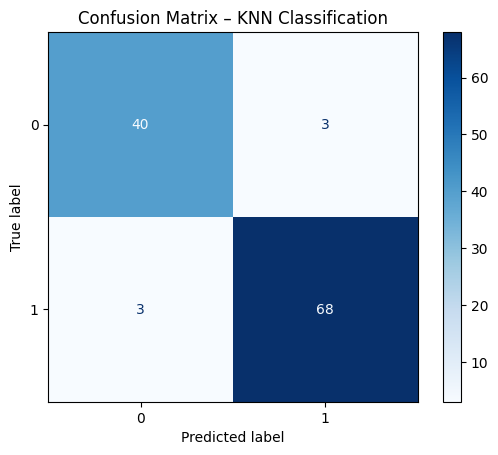

In [13]:
# Visualize confusion matrix

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – KNN Classification")
plt.show()


### Classification report

The classification report summarizes performance
for each class using:

- Precision
- Recall
- F1-score

These metrics help evaluate trade-offs
between different types of errors.


In [14]:
# Classification report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### About the confusion matrix

In this notebook, we focus on interpreting the results
produced by the confusion matrix.

For a deeper explanation of:
- how each cell should be read
- common mistakes
- practical examples

please refer to the dedicated **Confusion Matrix**
page in the general concepts section of this project.


### Key takeaway

KNN Classification evaluation highlights:
- the impact of local neighborhoods
- the sensitivity to class boundaries
- the importance of inspecting error types

The confusion matrix is the most informative tool
to understand these behaviors.


# ____________________________________
## 10. When to use it and when not to (KNN Classification)

KNN Classification is simple and intuitive,
but its effectiveness depends heavily
on the structure and size of the dataset.

Understanding when to use it
helps avoid poor performance and inefficiency.


### When KNN Classification is a good choice

KNN Classification works well when:

- The dataset is relatively small or medium-sized
- Similar samples tend to belong to the same class
- Decision boundaries are complex and non-linear
- Interpretability at a local level is useful
- Feature scaling has been properly applied

KNN is often effective as:
- a baseline non-linear classifier
- a comparison point for more complex models


### When KNN Classification is NOT a good choice

KNN Classification may not be suitable when:

- The dataset is very large
- Fast prediction time is required
- Memory usage is a concern
- The data contains a lot of noise or irrelevant features
- Features are not scaled correctly


### Typical warning signs

You should be cautious if:

- Model performance changes drastically with different K values
- Predictions are unstable near class boundaries
- Small changes in data lead to very different results
- Computation time becomes excessive

These signs indicate that KNN
may not be the most efficient or robust choice.


### Key takeaway

KNN Classification is powerful because of its simplicity.

It adapts locally to the data
and requires very few assumptions.

However, its reliance on distances
makes it sensitive to preprocessing choices
and limits its scalability.


# ____________________________________
## 11. Model persistence (KNN Classification)

In this section we save the trained KNN classifier
and the preprocessing steps used during training.

Saving the model allows us to reuse it later
without repeating the entire pipeline.


### Why saving the model is important

Although KNN does not learn parameters,
saving the model is still useful.

It allows us to:
- reuse the trained classifier
- preserve the training data and configuration
- ensure reproducibility of results


### Important rule: save the scaler together with the model

KNN relies entirely on distances.

For this reason:
- the same feature scaling must be applied
- any mismatch in scaling invalidates predictions

Saving the scaler together with the model
ensures consistent distance calculations.


In [ ]:
from pathlib import Path
import joblib

# Define model directory
model_dir = Path("models/supervised_learning/classification/knn_classification")

# Create directory if it does not exist
model_dir.mkdir(parents=True, exist_ok=True)

# Save model and scaler
joblib.dump(knn_model, model_dir / "knn_classification_model.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")


### What we have now

- A trained KNN classification model
- A fitted feature scaler
- Both saved and ready to be reused

The model can now be:
- loaded without retraining
- applied to new data
- compared with other classifiers


### Loading the model later (conceptual example)

To reuse the model:
- load the scaler
- scale new input data
- load the KNN model
- generate predictions

This guarantees consistency
with the original training pipeline.


# ____________________________________
## 12. Mathematical formulation (deep dive)

This section provides a deeper explanation of KNN Classification
from a mathematical and algorithmic perspective.

The goal is to understand how predictions are formed,
not to derive formal proofs or equations.


### Representation of the data

KNN Classification operates directly on the training data.

Each training sample is represented by:
- a feature vector xᵢ ∈ ℝᵈ
- a class label yᵢ ∈ {0, 1}

The training dataset can be written as:
{(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}

No parameters are learned during training.
The entire training set is stored and used at prediction time.


For a new input x, predictions are made
by comparing x to all stored training samples.


### Distance metrics (mathematical view)

To compare two samples $x$ and $x_i$,
KNN uses a distance function $d(x, x_i)$.

**Euclidean distance**

$$
d(x, x_i) = \sqrt{\sum_{j=1}^{d} (x_j - x_{i,j})^2}
$$

This represents the straight-line distance
between two points in feature space.

**Manhattan distance**

$$
d(x, x_i) = \sum_{j=1}^{d} \lvert x_j - x_{i,j} \rvert
$$

This represents the distance obtained
by summing absolute differences along each feature dimension.



### Accuracy (mathematical definition)

Accuracy measures the proportion of correctly classified samples.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

where:
- $TP$ = True Positives  
- $TN$ = True Negatives  
- $FP$ = False Positives  
- $FN$ = False Negatives  


### Confusion matrix metrics (mathematical definitions)

From the confusion matrix, several important metrics can be derived.

**Precision**

$$
Precision = \frac{TP}{TP + FP}
$$

Measures how many predicted positives
are actually correct.

**Recall**

$$
Recall = \frac{TP}{TP + FN}
$$

Measures how many actual positives
are correctly identified.

**F1-score**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

Provides a balance between precision and recall.


### Bias–variance perspective

KNN behavior is strongly influenced by K:

- Small K:
  - low bias
  - high variance

- Large K:
  - higher bias
  - lower variance

Choosing K is therefore a trade-off
between flexibility and stability.


### Why scaling matters mathematically

Distance calculations depend on feature magnitudes.

Without scaling:
- features with large ranges dominate distances
- neighborhood structure becomes distorted

Standardization ensures that all features
contribute equally to distance computation,
making the mathematical behavior of KNN meaningful.


### Final takeaway

KNN Classification replaces a global model
with local comparisons.

By relying on:
- distance metrics
- neighborhood structure
- majority voting

it provides a flexible and intuitive approach
to classification, at the cost of scalability and stability.


# ____________________________________
## 13. Final summary – Code only

The following cell contains the complete classification pipeline
from data loading to model persistence.

No explanations are provided here on purpose.

This section is intended for:
- quick execution
- reference
- reuse in scripts or applications

If you want to understand what each step does and why,
read the notebook from top to bottom.


In [ ]:
# ====================================
# Imports
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# ====================================
# Feature scaling (mandatory for KNN)
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ====================================
# Model initialization
# ====================================

knn_model = KNeighborsClassifier(
    n_neighbors=5
)


# ====================================
# Model training
# ====================================

knn_model.fit(X_train_scaled, y_train)


# ====================================
# Predictions
# ====================================

y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)


# ====================================
# Model evaluation
# ====================================

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy
cm

print(classification_report(y_test, y_pred))


# ====================================
# Confusion matrix visualization
# ====================================

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – KNN Classification")
plt.show()


# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/classification/knn_classification")
model_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(knn_model, model_dir / "knn_classification_model.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")
